# Example Jupyter Use

In [19]:
import os
import pandas as pd
import numpy as np
import sqlite3

from matplotlib import pyplot as plt
plt.style.use('seaborn-dark-palette')

%matplotlib inline

# Define root of our App, Caveat, don't name other folders `Notebooks`
root = os.getcwd().split('Notebooks')[0]

## Connecting to our database

In [12]:
# Database location
database = os.path.join(root,'Sqlite3.db')

# Create a connection
conn = sqlite3.connect(database)

# Close a connection
conn.close()

# Preferred way, with context manager
with sqlite3.connect(database) as connection:
    print 'Connected to database.'

Connected to database.


## Handling data in database

In [13]:
# Best using Pandas
with sqlite3.connect(database) as connection:
    # View tables in database
    query  = "SELECT name FROM sqlite_master WHERE type = 'table'"
    tables = pd.read_sql(query, con = connection)
    
    # Define a query
    query = "SELECT * FROM PriceHistory"
    data  = pd.read_sql(query, con = connection)
    
# View first few records
data.head(10)

,id,Price,Site,Date,Type,Unit
0,1,0.09,CoinDesk,2010-07-17,Bitcoin,USD
1,2,0.08,CoinDesk,2010-07-18,Bitcoin,USD
2,3,0.07,CoinDesk,2010-07-19,Bitcoin,USD
3,4,0.08,CoinDesk,2010-07-20,Bitcoin,USD
4,5,0.05,CoinDesk,2010-07-21,Bitcoin,USD
5,6,0.06,CoinDesk,2010-07-22,Bitcoin,USD
6,7,0.05,CoinDesk,2010-07-23,Bitcoin,USD
7,8,0.05,CoinDesk,2010-07-24,Bitcoin,USD
8,9,0.06,CoinDesk,2010-07-25,Bitcoin,USD
9,10,0.06,CoinDesk,2010-07-26,Bitcoin,USD


## Now enjoy your analysis!

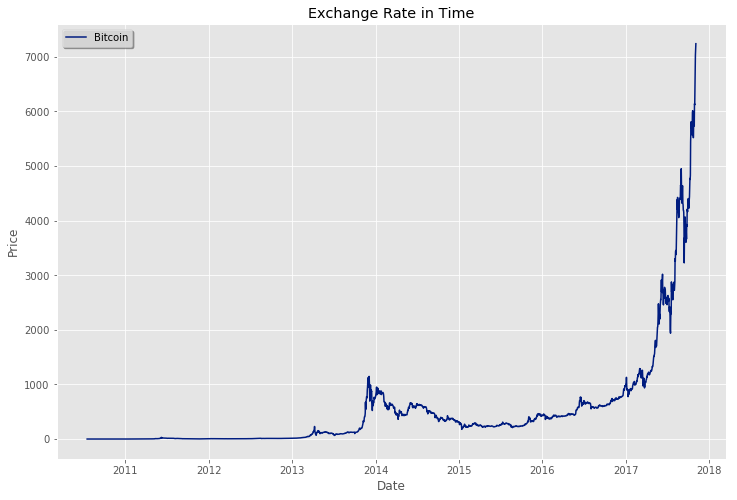

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
x = pd.to_datetime(data['Date'])
y = data['Price']
ax.plot(x,y, label='Bitcoin')
ax.set_title('Exchange Rate in Time')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()